In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
df = pd.read_excel('Employee Performance Dataset_C30_English.xlsx')
df.head()

,Employee_Id,Full_Name,Age,Education_Level,Hire_Date,Exit_Date,Department,Job_Role,Job_Level,Employment_Type,Base_Salary_Annual,Store_Location,Store_Location_Latitude,Store_Location_Longitude,Store_Id,Manager_Id,Manager_Name,Manager_Status
0,EMP000001,Marie Kim DDS,23,Master's,26/04/2021,13/04/2022,Store Operations,Cashier,Entry,Full-time,25745.40,Charlotte,35.2271,-80.8431,STR058,EMP001131,Michelle Walls,Executive
1,EMP000002,Danny Morgan,26,Master's,03/09/2021,NaN,Store Operations,Sales Associate,Associate,Full-time,39408.57,San Jose,37.3382,-121.8863,STR137,EMP002456,Jennifer Moore,Executive
2,EMP000003,Crystal Robinson,38,Bachelor's,25/08/2016,NaN,Store Operations,Cashier,Entry,Full-time,29319.94,Jacksonville,30.3322,-81.6557,STR008,EMP000529,Melissa Bishop,Senior Manager
3,EMP000004,Mark Perez,33,Bachelor's,10/12/2021,NaN,Store Operations,Senior Sales Associate,Senior_Associate,Full-time,43979.88,Las Vegas,36.1699,-115.1398,STR063,EMP001305,Tina Walter,Senior Manager
4,EMP000005,Shannon Jones,24,High School,24/02/2018,NaN,Store Operations,Cashier,Entry,Full-time,23560.19,Chicago,41.8781,-87.6298,STR109,EMP001823,Nicholas Fitzgerald,Senior Manager


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee_Id               7500 non-null   object 
 1   Full_Name                 7500 non-null   object 
 2   Age                       7500 non-null   int64  
 3   Education_Level           7500 non-null   object 
 4   Hire_Date                 7500 non-null   object 
 5   Exit_Date                 1491 non-null   object 
 6   Department                7500 non-null   object 
 7   Job_Role                  7500 non-null   object 
 8   Job_Level                 7500 non-null   object 
 9   Employment_Type           7500 non-null   object 
 10  Base_Salary_Annual        7500 non-null   float64
 11  Store_Location            7500 non-null   object 
 12  Store_Location_Latitude   7500 non-null   float64
 13  Store_Location_Longitude  7500 non-null   float64
 14  Store_Id

In [4]:
df.isnull().sum().sort_values(ascending=False)

Exit_Date                   6009
Manager_Id                     5
Manager_Status                 5
Manager_Name                   5
Full_Name                      0
Employee_Id                    0
Department                     0
Age                            0
Education_Level                0
Hire_Date                      0
Employment_Type                0
Job_Level                      0
Job_Role                       0
Base_Salary_Annual             0
Store_Location_Longitude       0
Store_Location_Latitude        0
Store_Location                 0
Store_Id                       0
dtype: int64

## Data Cleaning

In [5]:
# 1. Convert date columns
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], format='%d/%m/%Y', errors='coerce')
df['Exit_Date'] = pd.to_datetime(df['Exit_Date'], format='%d/%m/%Y', errors='coerce')

# 2. Create Attrition Flag
df['Attrition'] = df['Exit_Date'].notna().astype(int)

# 3. Tenure calculation
today = pd.to_datetime('today')

df['Tenure_Days'] = np.where(
    df['Exit_Date'].notna(),
    (df['Exit_Date'] - df['Hire_Date']).dt.days,
    (today - df['Hire_Date']).dt.days
)

df['Tenure_Years'] = df['Tenure_Days'] / 365

# 4. Handle missing manager fields
manager_cols = ['Manager_Id', 'Manager_Name', 'Manager_Status']
df[manager_cols] = df[manager_cols].fillna('Unknown')

# 5. Standardize Job_Level (strip spaces + uppercase first letter)
df['Job_Level'] = df['Job_Level'].str.replace(' ', '_').str.strip().str.title()

# 6. Strip whitespace from all object columns
obj_cols = df.select_dtypes(include='object').columns
df[obj_cols] = df[obj_cols].apply(lambda x: x.str.strip())

# 7. Remove duplicates
df = df.drop_duplicates()

# 8. Validate Age
df = df[(df['Age'] > 16) & (df['Age'] < 70)]

# 9. Validate Salary (no negative salaries)
df = df[df['Base_Salary_Annual'] > 0]

# 10. Check missing values summary
missing_summary = df.isnull().sum()

df.head(), missing_summary

(  Employee_Id         Full_Name  Age Education_Level  Hire_Date  Exit_Date  \
 0   EMP000001     Marie Kim DDS   23        Master's 2021-04-26 2022-04-13   
 1   EMP000002      Danny Morgan   26        Master's 2021-09-03        NaT   
 2   EMP000003  Crystal Robinson   38      Bachelor's 2016-08-25        NaT   
 3   EMP000004        Mark Perez   33      Bachelor's 2021-12-10        NaT   
 4   EMP000005     Shannon Jones   24     High School 2018-02-24        NaT   
 
          Department                Job_Role         Job_Level Employment_Type  \
 0  Store Operations                 Cashier             Entry       Full-time   
 1  Store Operations         Sales Associate         Associate       Full-time   
 2  Store Operations                 Cashier             Entry       Full-time   
 3  Store Operations  Senior Sales Associate  Senior_Associate       Full-time   
 4  Store Operations                 Cashier             Entry       Full-time   
 
    ...  Store_Location Store_

## EDA and Visualization

In [6]:
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
# Shape
print("Dataset shape:", df.shape)

# Basic Info
print("\nDataset Info:")
print(df.info())

Dataset shape: (7500, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Employee_Id               7500 non-null   object        
 1   Full_Name                 7500 non-null   object        
 2   Age                       7500 non-null   int64         
 3   Education_Level           7500 non-null   object        
 4   Hire_Date                 7500 non-null   datetime64[ns]
 5   Exit_Date                 1491 non-null   datetime64[ns]
 6   Department                7500 non-null   object        
 7   Job_Role                  7500 non-null   object        
 8   Job_Level                 7500 non-null   object        
 9   Employment_Type           7500 non-null   object        
 10  Base_Salary_Annual        7500 non-null   float64       
 11  Store_Location            7500 non-null  

In [8]:
# Summary Stats
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Summary Statistics:
       Employee_Id       Full_Name          Age Education_Level  \
count         7500            7500  7500.000000            7500   
unique        7500            7107          NaN               5   
top      EMP000001  Jennifer Smith          NaN     High School   
freq             1               6          NaN            2665   
mean           NaN             NaN    32.450000             NaN   
min            NaN             NaN    21.000000             NaN   
25%            NaN             NaN    27.000000             NaN   
50%            NaN             NaN    32.000000             NaN   
75%            NaN             NaN    37.000000             NaN   
max            NaN             NaN    64.000000             NaN   
std            NaN             NaN     7.482319             NaN   

                         Hire_Date                   Exit_Date  \
count                         7500                        1491   
unique                         NaN        

### Distribution of Numerical Features

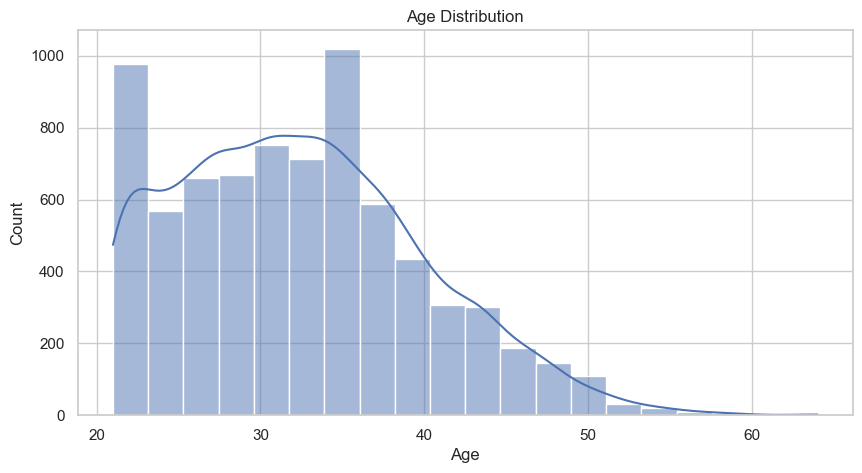

In [9]:
# Age Distribution

plt.figure(figsize=(10,5))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

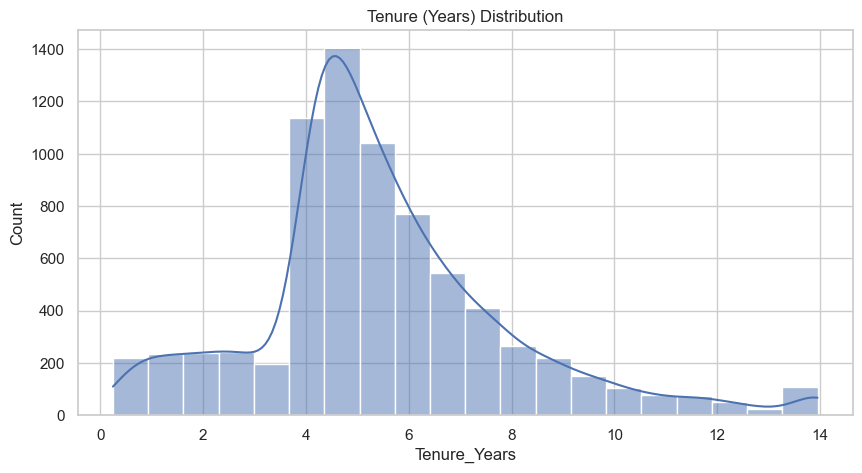

In [10]:
# Tenure Distribution

plt.figure(figsize=(10,5))
sns.histplot(df['Tenure_Years'], kde=True, bins=20)
plt.title("Tenure (Years) Distribution")
plt.show()

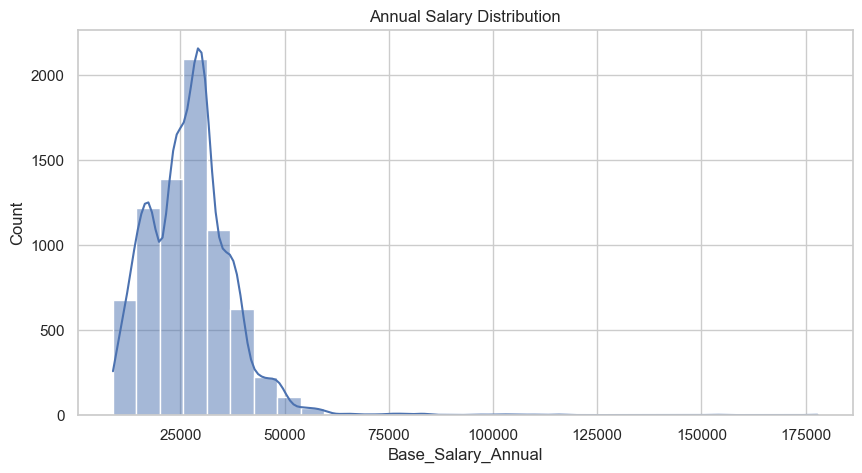

In [11]:
# Salary Distribution

plt.figure(figsize=(10,5))
sns.histplot(df['Base_Salary_Annual'], kde=True, bins=30)
plt.title("Annual Salary Distribution")
plt.show()

### Categorical Feature Insights

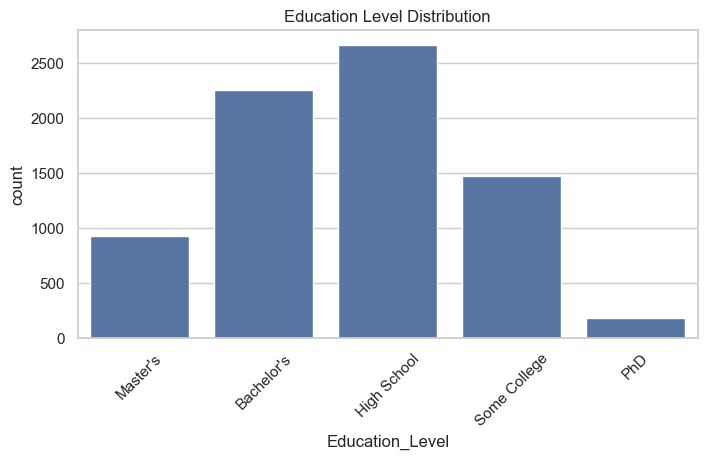

In [12]:
# Education levels

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Education_Level')
plt.xticks(rotation=45)
plt.title("Education Level Distribution")
plt.show()

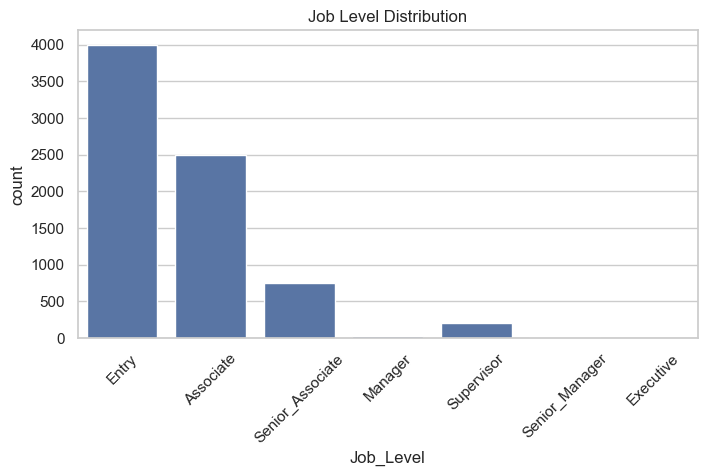

In [13]:
# Job levels

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Job_Level')
plt.xticks(rotation=45)
plt.title("Job Level Distribution")
plt.show()

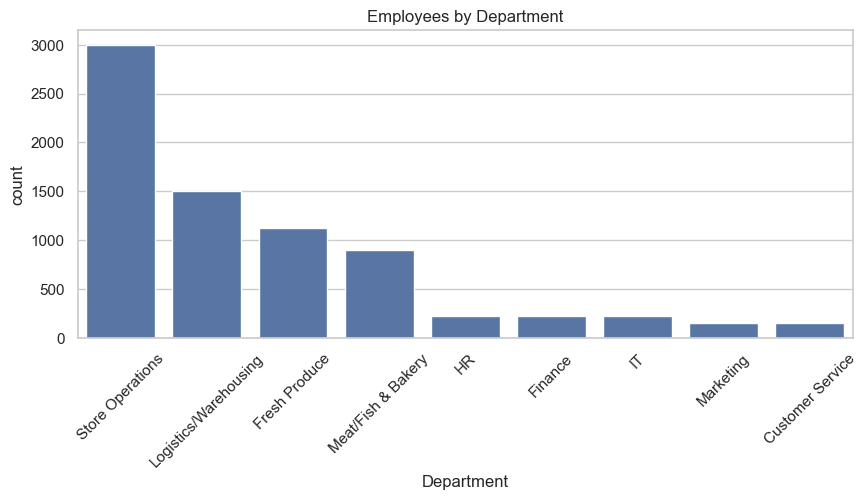

In [14]:
# Departments

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Department')
plt.xticks(rotation=45)
plt.title("Employees by Department")
plt.show()

### Salary Analysis

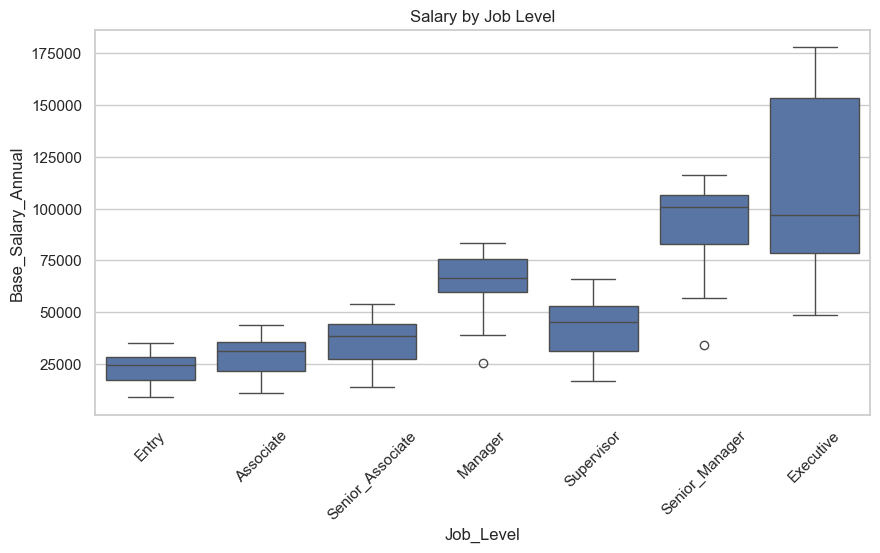

In [15]:
# Salary by job level

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Job_Level', y='Base_Salary_Annual')
plt.xticks(rotation=45)
plt.title("Salary by Job Level")
plt.show()

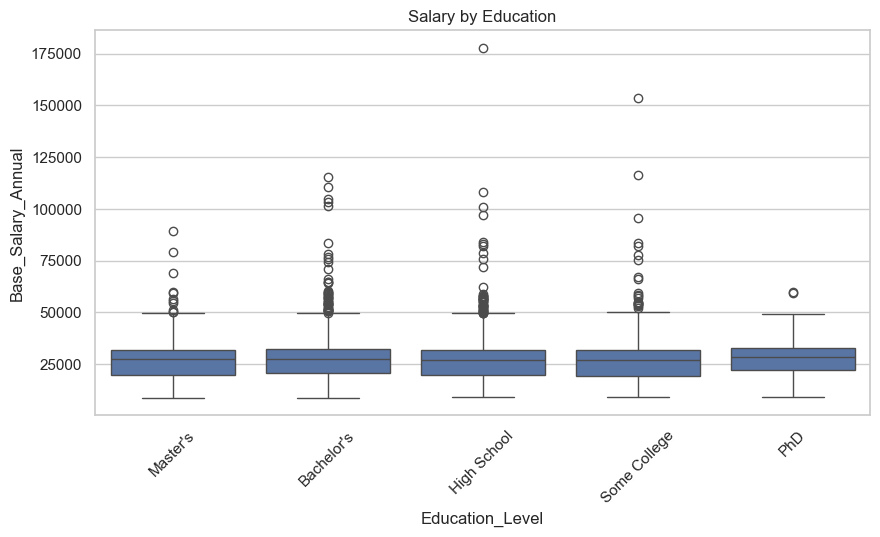

In [16]:
# Salary by Education Level

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Education_Level', y='Base_Salary_Annual')
plt.xticks(rotation=45)
plt.title("Salary by Education")
plt.show()

### Attrition analysis

In [17]:
# attrition rate
attrition_rate = df['Attrition'].mean()
print(f"Attrition Rate: {attrition_rate:.2%}")

Attrition Rate: 19.88%


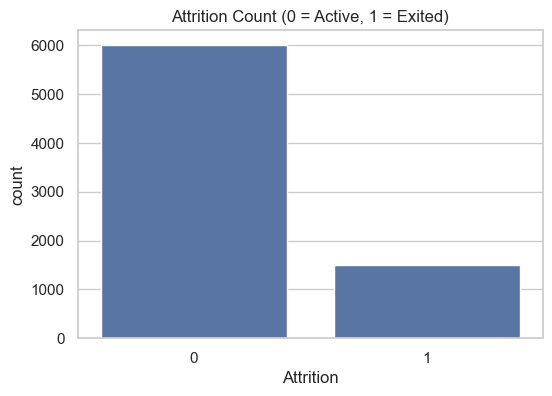

In [18]:
# attirition countplot

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Count (0 = Active, 1 = Exited)")
plt.show()

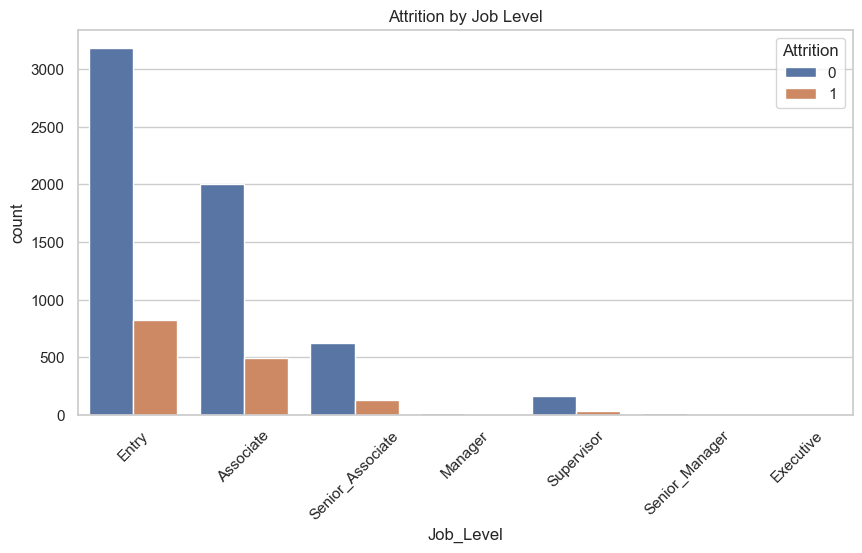

In [19]:
# attrition by job level

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Job_Level', hue='Attrition')
plt.xticks(rotation=45)
plt.title("Attrition by Job Level")
plt.show()

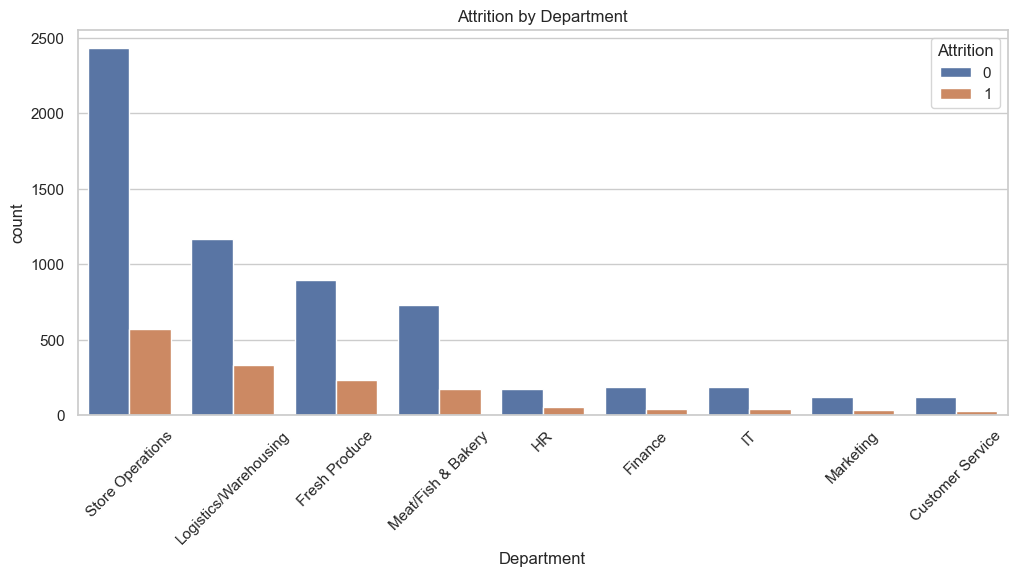

In [20]:
# Attrition by Department

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.xticks(rotation=45)
plt.title("Attrition by Department")
plt.show()

### Store Level Insight

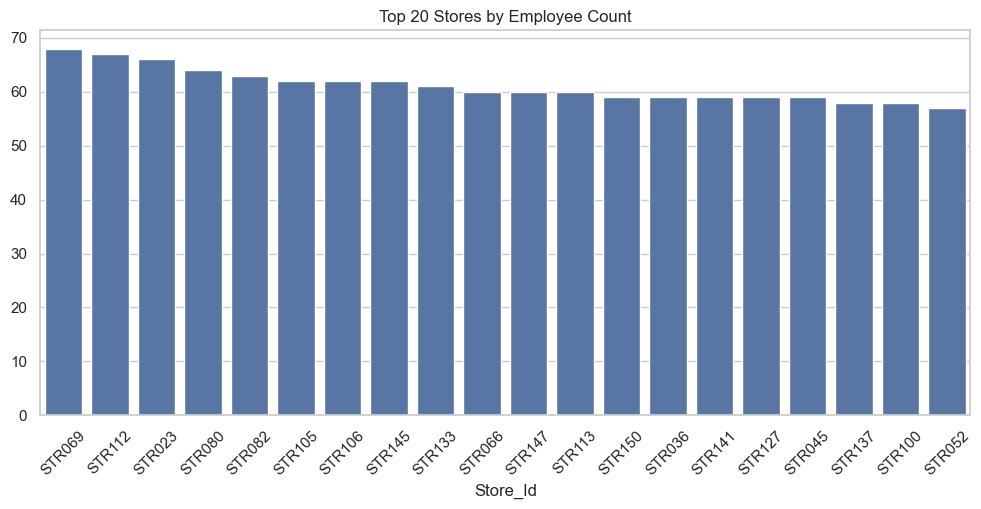

In [21]:
# Employee count by store(Top 20)

store_counts = df['Store_Id'].value_counts().head(20)

plt.figure(figsize=(12,5))
sns.barplot(x=store_counts.index, y=store_counts.values)
plt.xticks(rotation=45)
plt.title("Top 20 Stores by Employee Count")
plt.show()

### Manager Insight

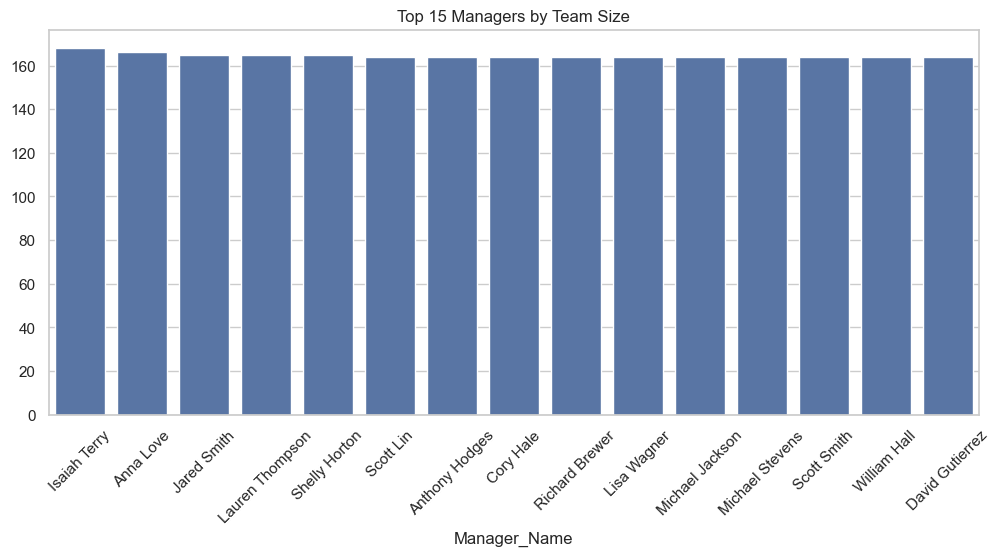

In [22]:
# Employees per manager (top 15)

manager_counts = df['Manager_Name'].value_counts().head(15)

plt.figure(figsize=(12,5))
sns.barplot(x=manager_counts.index, y=manager_counts.values)
plt.xticks(rotation=45)
plt.title("Top 15 Managers by Team Size")
plt.show()

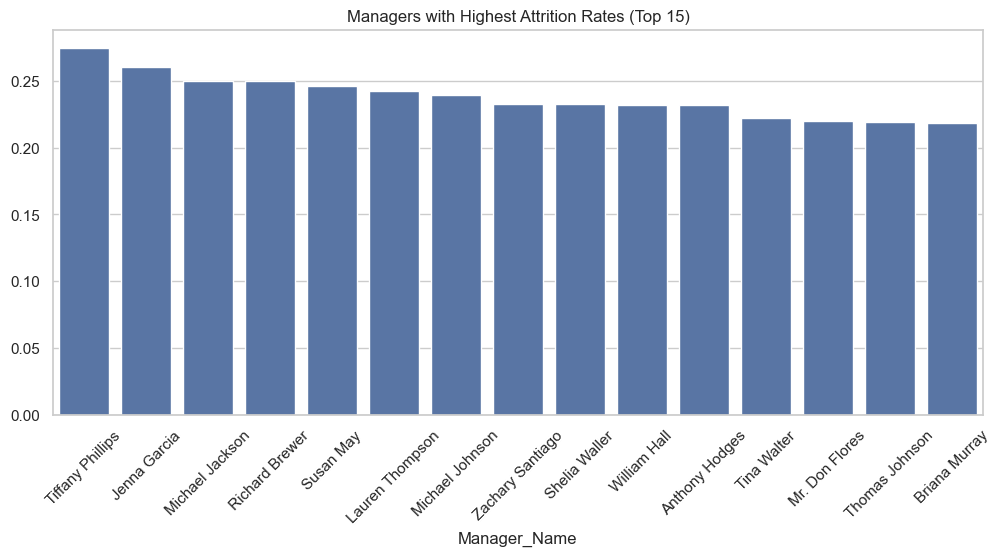

In [23]:
# Attrition by manager

mgr_attrition = df.groupby('Manager_Name')['Attrition'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,5))
sns.barplot(x=mgr_attrition.index, y=mgr_attrition.values)
plt.xticks(rotation=45)
plt.title("Managers with Highest Attrition Rates (Top 15)")
plt.show()

### Correlation heatmap

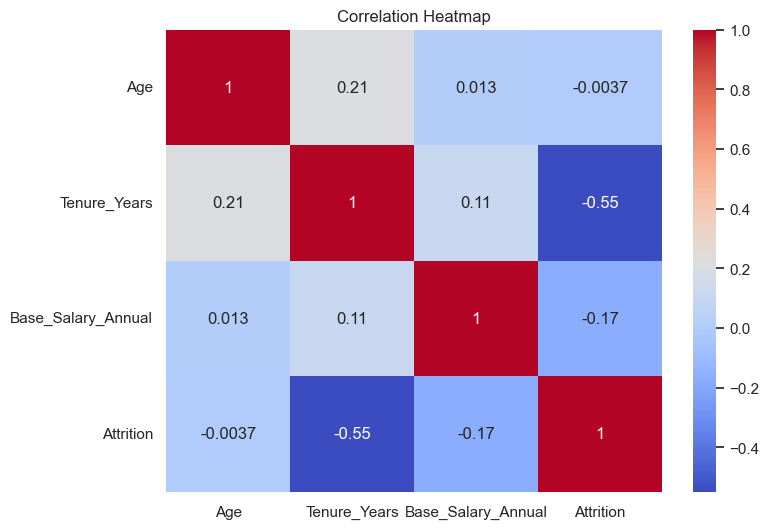

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','Tenure_Years','Base_Salary_Annual','Attrition']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

In [25]:
# Tenure categories

def tenure_group(x):
    if x < 1:
        return "New Hire"
    elif x < 3:
        return "Junior"
    elif x < 7:
        return "Mid-Level"
    else:
        return "Senior"

df['Tenure_Group'] = df['Tenure_Years'].apply(tenure_group)

In [26]:
# Age groups

df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[18, 25, 35, 50, 70],
    labels=["18–25", "26–35", "36–50", "50+"]
)

In [27]:
# Salary brackets

df['Salary_Bracket'] = pd.qcut(
    df['Base_Salary_Annual'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Top']
)

In [28]:
# was employee a manager

df['Is_Manager'] = df['Job_Level'].str.contains("Manager|Senior Manager|Executive", case=False).astype(int)

In [29]:
# Store Size (Small, Medium, Large)

store_sizes = df['Store_Id'].value_counts()

df['Store_Size'] = df['Store_Id'].map(store_sizes)

df['Store_Size_Group'] = pd.cut(
    df['Store_Size'],
    bins=[0, 50, 150, 1000],
    labels=["Small", "Medium", "Large"]
)

In [30]:
# Manager Team size

manager_team_size = df['Manager_Id'].value_counts()

df['Manager_Team_Size'] = df['Manager_Id'].map(manager_team_size)

In [31]:
# Salary log (for ML Stability)

df['Log_Salary'] = np.log(df['Base_Salary_Annual'])

In [32]:
# Work year

df['Hire_Year'] = df['Hire_Date'].dt.year

In [33]:
# average salary by store

store_avg_salary = df.groupby('Store_Id')['Base_Salary_Annual'].mean()
df['Store_Avg_Salary'] = df['Store_Id'].map(store_avg_salary)

In [34]:
df.head()

,Employee_Id,Full_Name,Age,Education_Level,Hire_Date,Exit_Date,Department,Job_Role,Job_Level,Employment_Type,...,Tenure_Group,Age_Group,Salary_Bracket,Is_Manager,Store_Size,Store_Size_Group,Manager_Team_Size,Log_Salary,Hire_Year,Store_Avg_Salary
0,EMP000001,Marie Kim DDS,23,Master's,2021-04-26,2022-04-13,Store Operations,Cashier,Entry,Full-time,...,New Hire,18–25,Medium,0,55,Medium,147,10.156011,2021,27370.912909
1,EMP000002,Danny Morgan,26,Master's,2021-09-03,NaT,Store Operations,Sales Associate,Associate,Full-time,...,Mid-Level,26–35,Top,0,58,Medium,147,10.581739,2021,25278.142241
2,EMP000003,Crystal Robinson,38,Bachelor's,2016-08-25,NaT,Store Operations,Cashier,Entry,Full-time,...,Senior,36–50,High,0,51,Medium,146,10.286023,2016,25523.060392
3,EMP000004,Mark Perez,33,Bachelor's,2021-12-10,NaT,Store Operations,Senior Sales Associate,Senior_Associate,Full-time,...,Mid-Level,26–35,Top,0,46,Small,144,10.691488,2021,29513.067826
4,EMP000005,Shannon Jones,24,High School,2018-02-24,NaT,Store Operations,Cashier,Entry,Full-time,...,Senior,18–25,Medium,0,53,Medium,143,10.067314,2018,25867.658868


## Building the attrition prediction model

In [41]:
# Preparing data for modeling

drop_cols = [
    'Attrition', 'Full_Name', 'Employee_Id',
    'Manager_Name', 'Manager_Id',
    'Hire_Date', 'Exit_Date', 'Store_Id'
]

x = df.drop(columns=drop_cols)
y = df['Attrition']

In [42]:
# Defining the column types

categorical_cols = [
    'Education_Level',
    'Department',
    'Job_Role',
    'Job_Level',
    'Employment_Type',
    'Store_Location',
    'Manager_Status',
    'Tenure_Group',
    'Age_Group',
    'Salary_Bracket',
    'Store_Size_Group'
]

numeric_cols = [
    'Age',
    'Base_Salary_Annual',
    'Tenure_Years',
    'Store_Location_Latitude',
    'Store_Location_Longitude',
    'Is_Manager',
    'Store_Size',
    'Manager_Team_Size',
    'Log_Salary',
    'Hire_Year',
    'Store_Avg_Salary'
]

In [43]:
# column transformer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

In [44]:
# Building the Logistic Regression model pipeline

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_reg_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=300))
])

In [45]:
# Building the Random Forest model pipeline

from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight='balanced'
    ))
])

In [46]:
# Building the XGBoost model pipeline

from xgboost import XGBClassifier

xgb_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric='logloss',
        random_state=42
    ))
])

In [47]:
# Splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Fitting the models

log_reg_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [48]:
y.value_counts(normalize=True)

Attrition
0    0.8012
1    0.1988
Name: proportion, dtype: float64

In [49]:
# Model Evaluation Function

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

def evaluate_model(model, x_test, y_test, model_name="Model"):
    # Predictions
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    print(f"\n{'='*40}")
    print(f"{model_name} - Classification Report")
    print(f"{'='*40}")
    print(classification_report(y_test, y_pred))

    # ROC-AUC
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"{model_name} ROC-AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"{model_name} - ROC Curve")
    plt.show()


Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1202
           1       1.00      0.94      0.97       298

    accuracy                           0.99      1500
   macro avg       0.99      0.97      0.98      1500
weighted avg       0.99      0.99      0.99      1500

Logistic Regression ROC-AUC: 1.0000


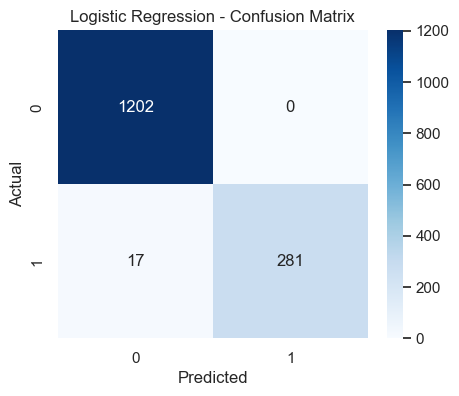

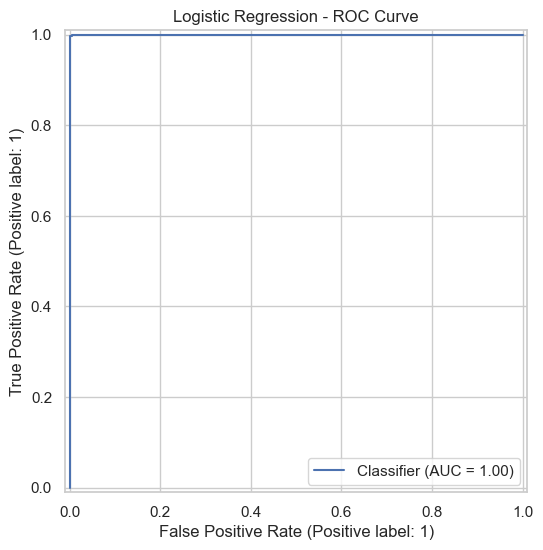


Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1202
           1       1.00      0.82      0.90       298

    accuracy                           0.96      1500
   macro avg       0.98      0.91      0.94      1500
weighted avg       0.97      0.96      0.96      1500

Random Forest ROC-AUC: 0.9874


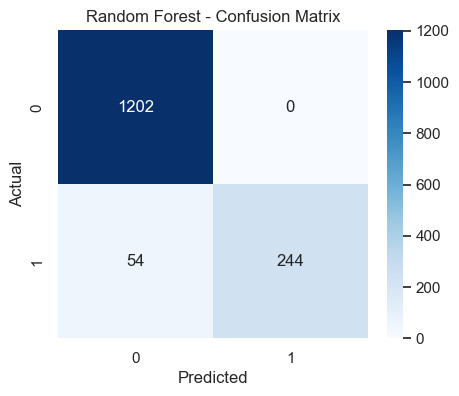

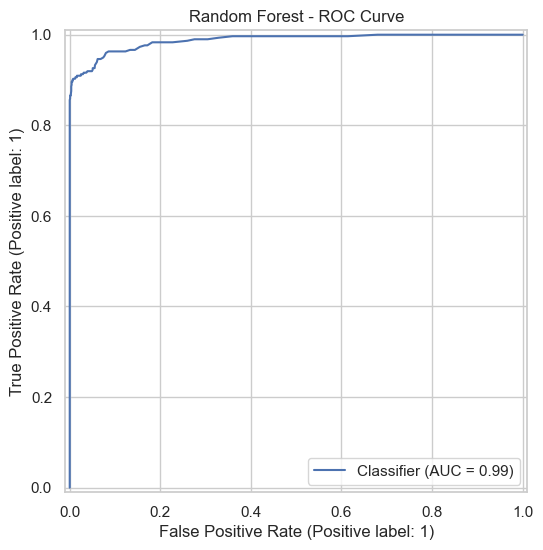


XGBoost - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1202
           1       1.00      0.98      0.99       298

    accuracy                           1.00      1500
   macro avg       1.00      0.99      0.99      1500
weighted avg       1.00      1.00      1.00      1500

XGBoost ROC-AUC: 0.9999


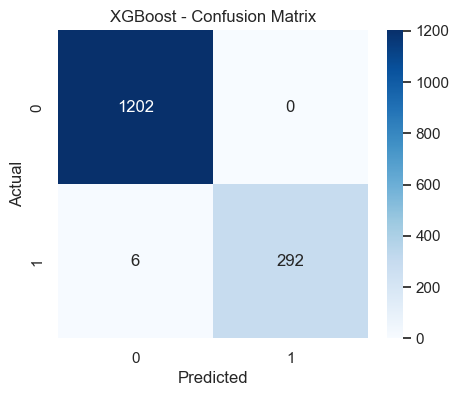

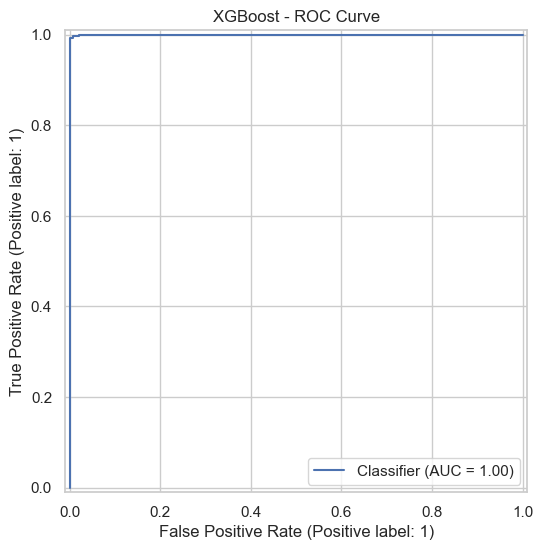

In [50]:
# Evaluating all models

evaluate_model(log_reg_model, x_test, y_test, "Logistic Regression")
evaluate_model(rf_model, x_test, y_test, "Random Forest")
evaluate_model(xgb_model, x_test, y_test, "XGBoost")

The models are too perfect, data leakage suspected, we will try another approach by dropping these leak future information

Tenure_Years

Tenure_Group

We will use instead a fixed reference date that simulates “today at prediction time”.

In [51]:
# Create Fixed Tenure (Leak-Free)

# Choose a reference date after the latest hire date but not using Exit_Date.

reference_date = pd.to_datetime("2023-12-31")

df['Tenure_Years_Fixed'] = (
    (reference_date - df['Hire_Date']).dt.days / 365
)

df[['Hire_Date', 'Tenure_Years_Fixed']].head()

,Hire_Date,Tenure_Years_Fixed
0,2021-04-26,2.682192
1,2021-09-03,2.326027
2,2016-08-25,7.353425
3,2021-12-10,2.057534
4,2018-02-24,5.852055


In [ ]:
# Remove leakage features

leakage_cols = [
    'Tenure_Years',
    'Tenure_Group'
]

df = df.drop(columns=leakage_cols)

### Rebuild Features

In [53]:
# target

y = df['Attrition']

drop_cols = [
    'Attrition',
    'Full_Name',
    'Employee_Id',
    'Manager_Name',
    'Manager_Id',
    'Hire_Date',
    'Exit_Date',
    'Store_Id'
]

x = df.drop(columns=drop_cols)

In [54]:
# Define feature types

categorical_cols = [
    'Education_Level',
    'Department',
    'Job_Role',
    'Job_Level',
    'Employment_Type',
    'Store_Location',
    'Manager_Status',
    'Age_Group',
    'Salary_Bracket',
    'Store_Size_Group'
]

numeric_cols = [
    'Age',
    'Base_Salary_Annual',
    'Tenure_Years_Fixed',
    'Store_Location_Latitude',
    'Store_Location_Longitude',
    'Is_Manager',
    'Store_Size',
    'Manager_Team_Size',
    'Log_Salary',
    'Hire_Year',
    'Store_Avg_Salary'
]

In [55]:
# Preprocessing pipeline

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

In [56]:
# Rebuild models
# Logistic Regression

log_reg_model = Pipeline([
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=300, class_weight='balanced'))
])

# Random Forest

rf_model = Pipeline([
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight='balanced'
    ))
])


# XGBoost

xgb_model = Pipeline([
    ('preprocess', preprocess),
    ('model', XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric='logloss',
        random_state=42
    ))
])

In [57]:
# Train test split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Training the models again

log_reg_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True



Logistic Regression (Leak-Free) - Classification Report
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1202
           1       0.29      0.50      0.37       298

    accuracy                           0.66      1500
   macro avg       0.57      0.60      0.57      1500
weighted avg       0.74      0.66      0.69      1500

Logistic Regression (Leak-Free) ROC-AUC: 0.6476


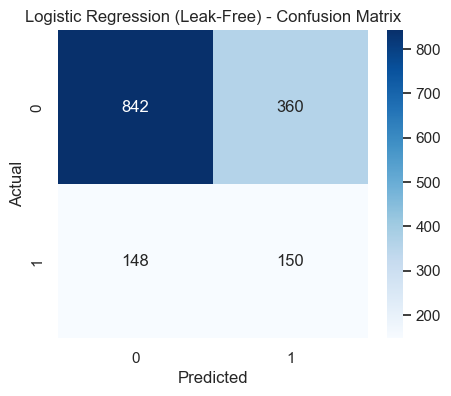

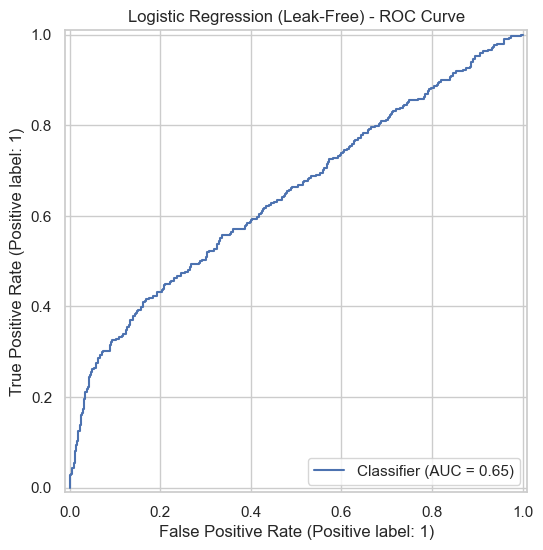


Random Forest (Leak-Free) - Classification Report
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1202
           1       0.59      0.13      0.22       298

    accuracy                           0.81      1500
   macro avg       0.70      0.56      0.55      1500
weighted avg       0.77      0.81      0.76      1500

Random Forest (Leak-Free) ROC-AUC: 0.6170


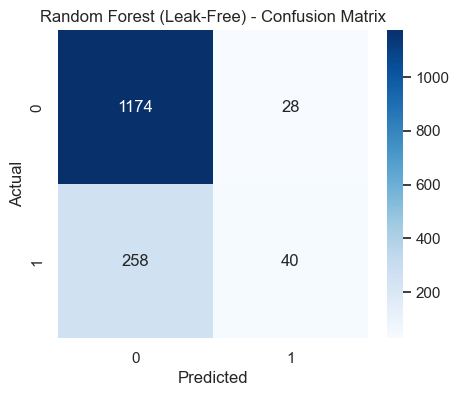

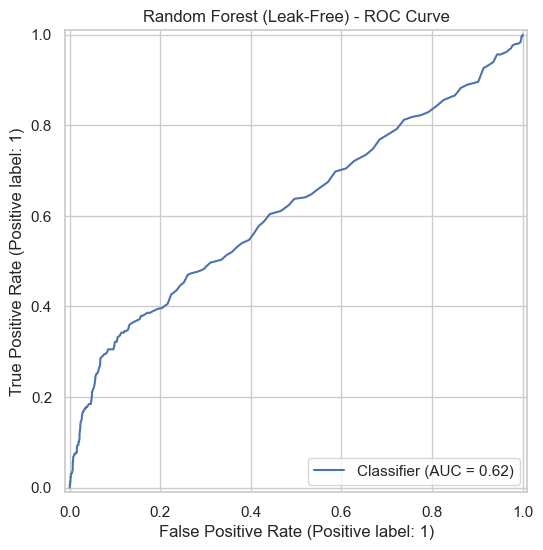


XGBoost (Leak-Free) - Classification Report
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1202
           1       0.48      0.15      0.23       298

    accuracy                           0.80      1500
   macro avg       0.65      0.56      0.56      1500
weighted avg       0.75      0.80      0.76      1500

XGBoost (Leak-Free) ROC-AUC: 0.5940


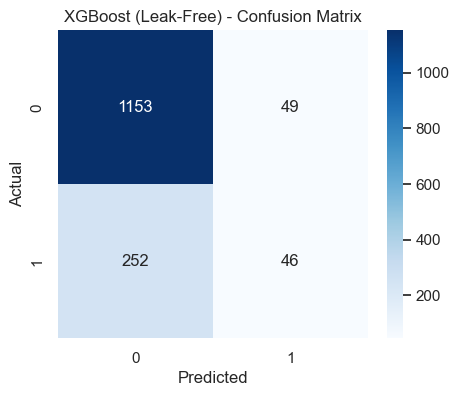

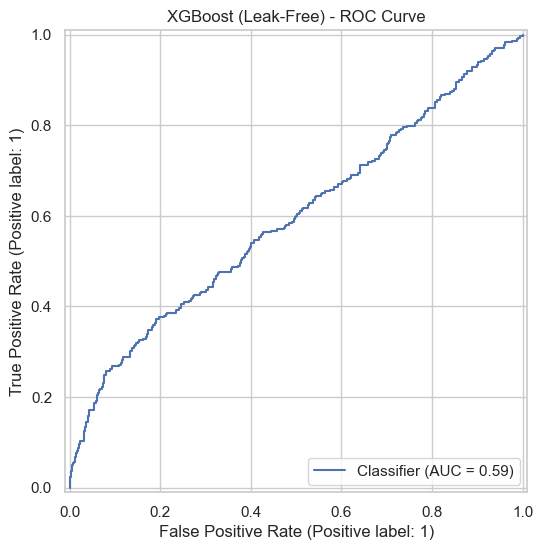

In [58]:
# Evaluate again

evaluate_model(log_reg_model, x_test, y_test, "Logistic Regression (Leak-Free)")
evaluate_model(rf_model, x_test, y_test, "Random Forest (Leak-Free)")
evaluate_model(xgb_model, x_test, y_test, "XGBoost (Leak-Free)")

### Applying class weighting

In [59]:
# Logistic Regression with custom class weights

log_reg_weighted = Pipeline([
    ('preprocess', preprocess),
    ('model', LogisticRegression(
        max_iter=500,
        class_weight={0: 1, 1: 3},  # emphasize attrition
        C=0.5,
        random_state=42
    ))
])

log_reg_weighted.fit(x_train, y_train)


# Random Forest with custom class weights

rf_weighted = Pipeline([
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=500,
        max_depth=12,
        min_samples_leaf=20,
        class_weight={0: 1, 1: 4},
        random_state=42,
        n_jobs=-1
    ))
])

rf_weighted.fit(x_train, y_train)


# XGBoost with scale_pos_weight

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
scale_pos_weight

xgb_weighted = Pipeline([
    ('preprocess', preprocess),
    ('model', XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,  # MOST IMPORTANT
        eval_metric='auc',
        random_state=42
    ))
])

xgb_weighted.fit(x_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [60]:
# Helper function for all models

from sklearn.metrics import recall_score, precision_score

def tune_threshold(model, x_test, y_test):
    probs = model.predict_proba(x_test)[:, 1]
    
    print("Threshold | Recall (Attrition) | Precision")
    print("--------------------------------------------")
    
    for t in np.arange(0.1, 0.6, 0.05):
        preds = (probs >= t).astype(int)
        recall = recall_score(y_test, preds)
        precision = precision_score(y_test, preds, zero_division=0)
        print(f"{t:.2f}      | {recall:.2f}               | {precision:.2f}")

In [61]:
# Tuning thresholds

tune_threshold(log_reg_weighted, x_test, y_test)
tune_threshold(rf_weighted, x_test, y_test)
tune_threshold(xgb_weighted, x_test, y_test)

Threshold | Recall (Attrition) | Precision
--------------------------------------------
0.10      | 1.00               | 0.20
0.15      | 1.00               | 0.20
0.20      | 0.99               | 0.20
0.25      | 0.92               | 0.21
0.30      | 0.81               | 0.22
0.35      | 0.67               | 0.25
0.40      | 0.57               | 0.28
0.45      | 0.47               | 0.33
0.50      | 0.40               | 0.38
0.55      | 0.33               | 0.44
Threshold | Recall (Attrition) | Precision
--------------------------------------------
0.10      | 1.00               | 0.20
0.15      | 1.00               | 0.20
0.20      | 1.00               | 0.20
0.25      | 0.99               | 0.20
0.30      | 0.94               | 0.20
0.35      | 0.80               | 0.22
0.40      | 0.64               | 0.26
0.45      | 0.54               | 0.30
0.50      | 0.46               | 0.32
0.55      | 0.37               | 0.41
Threshold | Recall (Attrition) | Precision
---------------------

In [62]:
# Final Evaluation with chosen threshold (e.g., 0.30 for XGBoost)

threshold = 0.30

probs = xgb_weighted.predict_proba(x_test)[:, 1]
y_pred = (probs >= threshold).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, probs))

              precision    recall  f1-score   support

           0       0.84      0.59      0.70      1202
           1       0.25      0.54      0.34       298

    accuracy                           0.58      1500
   macro avg       0.54      0.57      0.52      1500
weighted avg       0.72      0.58      0.63      1500

ROC-AUC: 0.5877592156249651


In [64]:
# Ensure date columns are datetime
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])
df['Exit_Date'] = pd.to_datetime(df['Exit_Date'], errors='coerce')

# Snapshot date (leak-free reference point)
snapshot_date = df['Hire_Date'].max()

# Calculate tenure in days
df['Tenure_Days'] = (
    (df['Exit_Date'].fillna(snapshot_date) - df['Hire_Date'])
    .dt.days
)

# Convert to years
df['Tenure_Years'] = df['Tenure_Days'] / 365.25

In [65]:
# Avoid division issues

df['Tenure_Years_Capped'] = df['Tenure_Years'].clip(lower=0.1)

df['Early_Tenure'] = (df['Tenure_Years'] < 1).astype(int)
df['Mid_Tenure'] = ((df['Tenure_Years'] >= 1) & (df['Tenure_Years'] <= 3)).astype(int)
df['Long_Tenure'] = (df['Tenure_Years'] > 3).astype(int)

In [66]:
# Below Median Pay Level

job_level_median = df.groupby('Job_Level')['Base_Salary_Annual'].transform('median')

df['Below_Median_Pay_Level'] = (
    df['Base_Salary_Annual'] < job_level_median
).astype(int)

df['Salary_Per_Year'] = df['Base_Salary_Annual'] / df['Tenure_Years_Capped']

In [67]:
# Age and Job Level Interaction

df['Young_Low_Level'] = (
    (df['Age'] < 30) &
    (df['Job_Level'].isin(['Entry', 'Associate']))
).astype(int)

df['Older_Entry_Level'] = (
    (df['Age'] > 40) &
    (df['Job_Level'] == 'Entry')
).astype(int)

In [68]:
# Managment Signal

df['Manager_Missing'] = df['Manager_Id'].isna().astype(int)
df['Executive_Manager'] = (df['Manager_Status'] == 'Executive').astype(int)

In [69]:
# Location pressure

high_cost_cities = ['San Jose', 'San Francisco', 'New York', 'Los Angeles', 'Seattle']
df['High_Cost_Location'] = df['Store_Location'].isin(high_cost_cities).astype(int)

In [70]:
# Drop unnecessary columns for modeling

df_model = df.drop(columns=[
    'Employee_Id',
    'Full_Name',
    'Store_Location_Latitude',
    'Store_Location_Longitude'
])

In [71]:
num_features = [
    'Age',
    'Base_Salary_Annual',
    'Tenure_Years',
    'Salary_Per_Year'
]

cat_features = [
    'Education_Level',
    'Department',
    'Job_Role',
    'Job_Level',
    'Employment_Type',
    'Store_Location',
    'Manager_Status'
]

bin_features = [
    'Early_Tenure',
    'Mid_Tenure',
    'Long_Tenure',
    'Below_Median_Pay_Level',
    'Young_Low_Level',
    'Older_Entry_Level',
    'Manager_Missing',
    'Executive_Manager',
    'High_Cost_Location'
]

In [72]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features),
        ('bin', 'passthrough', bin_features)
    ]
)

In [73]:
# Splitting the data

x = df_model.drop(columns='Attrition')
y = df_model['Attrition']

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [74]:
# Logistic Regression with engineered features
log_reg_engineered = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(
        max_iter=500,
        class_weight={0: 1, 1: 4},
        C=0.3,
        solver='liblinear',
        random_state=42
    ))
])

log_reg_engineered.fit(x_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [75]:
# Threshold tuning function

def tune_threshold(model, x_test, y_test):
    probs = model.predict_proba(x_test)[:, 1]

    print("Threshold | Recall (Attrition) | Precision")
    print("--------------------------------------------")

    for t in np.arange(0.10, 0.55, 0.05):
        preds = (probs >= t).astype(int)
        recall = recall_score(y_test, preds)
        precision = precision_score(y_test, preds, zero_division=0)
        print(f"{t:.2f}      | {recall:.2f}               | {precision:.2f}")

In [76]:
tune_threshold(log_reg_engineered, x_test, y_test)

from sklearn.metrics import classification_report, roc_auc_score

threshold = 0.30

probs = log_reg_engineered.predict_proba(x_test)[:, 1]
y_pred = (probs >= threshold).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, probs))

Threshold | Recall (Attrition) | Precision
--------------------------------------------
0.10      | 1.00               | 0.21
0.15      | 0.99               | 0.22
0.20      | 0.98               | 0.22
0.25      | 0.96               | 0.23
0.30      | 0.93               | 0.23
0.35      | 0.91               | 0.25
0.40      | 0.84               | 0.26
0.45      | 0.71               | 0.28
0.50      | 0.58               | 0.30
              precision    recall  f1-score   support

           0       0.93      0.23      0.37      1202
           1       0.23      0.93      0.37       298

    accuracy                           0.37      1500
   macro avg       0.58      0.58      0.37      1500
weighted avg       0.79      0.37      0.37      1500

ROC-AUC: 0.7064679672581492


In [77]:
# Random Forest with custom class weights
rf_weighted = Pipeline([
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=500,
        max_depth=12,
        min_samples_leaf=20,
        class_weight={0:1, 1:4},
        random_state=42,
        n_jobs=-1
    ))
])

rf_weighted.fit(x_train, y_train)


# XGBoost with scale_pos_weight

# Compute scale_pos_weight for class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_weighted = Pipeline([
    ('preprocess', preprocess),
    ('model', XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,
        eval_metric='auc',
        use_label_encoder=False,
        random_state=42
    ))
])

xgb_weighted.fit(x_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [78]:
# Threshold tuning function
def tune_threshold(model, x_test, y_test):
    probs = model.predict_proba(x_test)[:, 1]

    print("Threshold | Recall (Attrition) | Precision")
    print("--------------------------------------------")

    for t in np.arange(0.10, 0.55, 0.05):
        preds = (probs >= t).astype(int)
        recall = recall_score(y_test, preds)
        precision = precision_score(y_test, preds, zero_division=0)
        print(f"{t:.2f}      | {recall:.2f}               | {precision:.2f}")


In [79]:
print("Random Forest Threshold Tuning")
tune_threshold(rf_weighted, x_test, y_test)

print("\nXGBoost Threshold Tuning")
tune_threshold(xgb_weighted, x_test, y_test)

Random Forest Threshold Tuning
Threshold | Recall (Attrition) | Precision
--------------------------------------------
0.10      | 1.00               | 0.20
0.15      | 1.00               | 0.21
0.20      | 1.00               | 0.21
0.25      | 0.99               | 0.23
0.30      | 0.95               | 0.24
0.35      | 0.90               | 0.25
0.40      | 0.81               | 0.26
0.45      | 0.69               | 0.29
0.50      | 0.56               | 0.34

XGBoost Threshold Tuning
Threshold | Recall (Attrition) | Precision
--------------------------------------------
0.10      | 0.91               | 0.23
0.15      | 0.85               | 0.24
0.20      | 0.81               | 0.27
0.25      | 0.73               | 0.28
0.30      | 0.67               | 0.31
0.35      | 0.60               | 0.32
0.40      | 0.55               | 0.35
0.45      | 0.49               | 0.36
0.50      | 0.45               | 0.39


In [80]:
# Final Evaluation with chosen threshold (e.g., 0.35 for Random Forest)

threshold_rf = 0.35  # adjust based on tuning

probs_rf = rf_weighted.predict_proba(x_test)[:, 1]
y_pred_rf = (probs_rf >= threshold_rf).astype(int)

print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, probs_rf))

Random Forest Performance
              precision    recall  f1-score   support

           0       0.93      0.33      0.48      1202
           1       0.25      0.90      0.39       298

    accuracy                           0.44      1500
   macro avg       0.59      0.61      0.44      1500
weighted avg       0.79      0.44      0.47      1500

ROC-AUC: 0.7215016359758344


In [81]:
# Final Evaluation with chosen threshold (e.g., 0.30 for XGBoost)
threshold_xgb = 0.30  # adjust based on tuning

probs_xgb = xgb_weighted.predict_proba(x_test)[:, 1]
y_pred_xgb = (probs_xgb >= threshold_xgb).astype(int)

print("XGBoost Performance")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, probs_xgb))

XGBoost Performance
              precision    recall  f1-score   support

           0       0.88      0.62      0.73      1202
           1       0.31      0.67      0.42       298

    accuracy                           0.63      1500
   macro avg       0.60      0.65      0.58      1500
weighted avg       0.77      0.63      0.67      1500

ROC-AUC: 0.712939284637461


## Feature importance

In [82]:
# Extract numeric & one-hot feature names from preprocessor
ohe_features = log_reg_engineered.named_steps['preprocess'] \
    .named_transformers_['cat'].get_feature_names_out(cat_features)

all_features = num_features + list(ohe_features) + bin_features

# Extract coefficients
coefficients = log_reg_engineered.named_steps['model'].coef_[0]

# Create a DataFrame
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

coef_df.head(15)  # Top 15 features by impact

,Feature,Coefficient
72,Job_Level_Manager,1.065194
3,Salary_Per_Year,-1.025647
77,Employment_Type_Full-time,-0.959778
79,Employment_Type_Seasonal,0.852757
76,Employment_Type_Contractor,0.680128
61,Job_Role_Shift Supervisor,0.660753
63,Job_Role_Store Manager,-0.648197
49,Job_Role_Produce Supervisor,0.568391
111,Long_Tenure,0.529738
45,Job_Role_Meat/Fish & Bakery Supervisor,-0.524340


In [83]:
rf_importances = rf_weighted.named_steps['model'].feature_importances_

rf_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

rf_df.head(15)  # Top 15 features

,Feature,Importance
3,Salary_Per_Year,0.179071
2,Tenure_Years,0.153022
1,Base_Salary_Annual,0.121624
77,Employment_Type_Full-time,0.099172
79,Employment_Type_Seasonal,0.097569
109,Early_Tenure,0.060159
0,Age,0.051382
112,Below_Median_Pay_Level,0.028201
78,Employment_Type_Part-time,0.021463
111,Long_Tenure,0.019632


In [84]:
xgb_importances = xgb_weighted.named_steps['model'].feature_importances_

xgb_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

xgb_df.head(15)  # Top 15 features

,Feature,Importance
79,Employment_Type_Seasonal,0.070821
77,Employment_Type_Full-time,0.044092
109,Early_Tenure,0.024535
78,Employment_Type_Part-time,0.019388
76,Employment_Type_Contractor,0.014867
72,Job_Level_Manager,0.014680
3,Salary_Per_Year,0.014159
103,Store_Location_San Jose,0.013166
2,Tenure_Years,0.012303
52,Job_Role_Senior Butcher,0.012119


In [85]:
!pip install shap --quiet


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
import shap
# Apply preprocessing to the test set
# Preprocess training data
x_train_processed = preprocess.fit_transform(x_train)
x_test_processed = preprocess.transform(x_test)

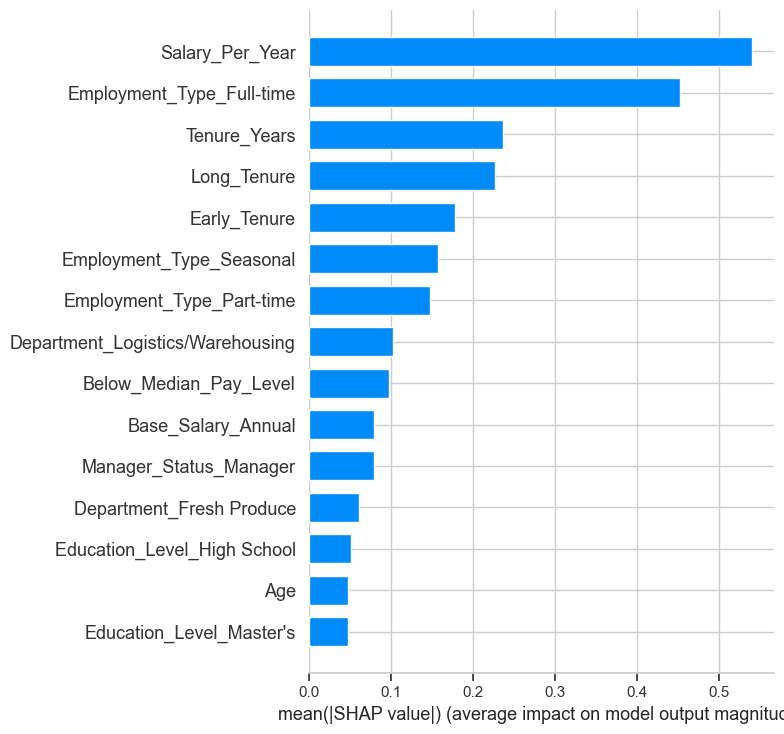

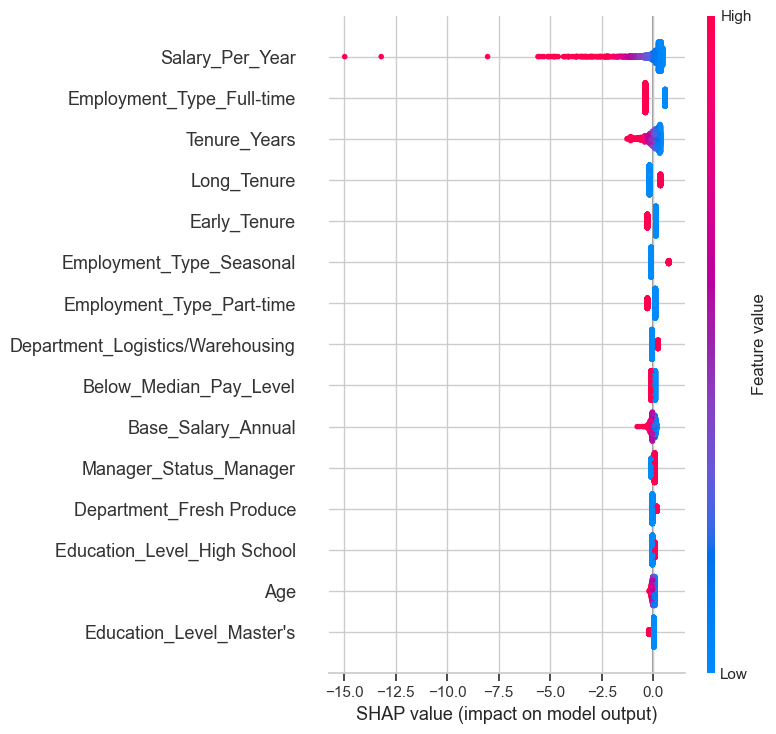

In [89]:
# Use feature_perturbation="interventional" (valid option)
explainer_lr = shap.LinearExplainer(
    log_reg_engineered.named_steps['model'], 
    x_train_processed, 
    feature_perturbation="interventional"
)

shap_values_lr = explainer_lr.shap_values(x_test_processed)

# Bar summary plot
shap.summary_plot(
    shap_values_lr, 
    x_test_processed, 
    feature_names=all_features, 
    plot_type="bar", 
    max_display=15
)

# Beeswarm summary plot (per-employee impact)
shap.summary_plot(
    shap_values_lr, 
    x_test_processed, 
    feature_names=all_features, 
    max_display=15
)

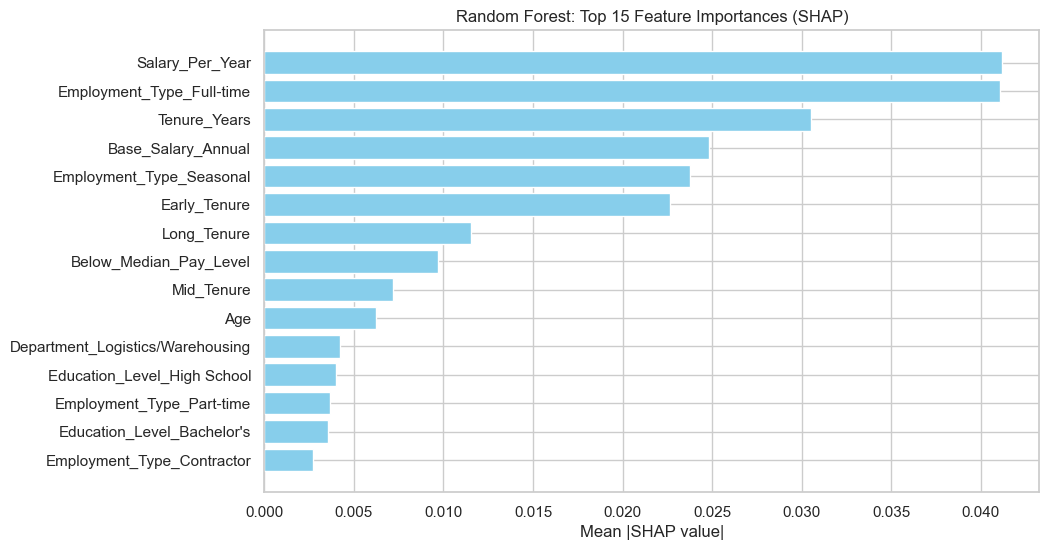

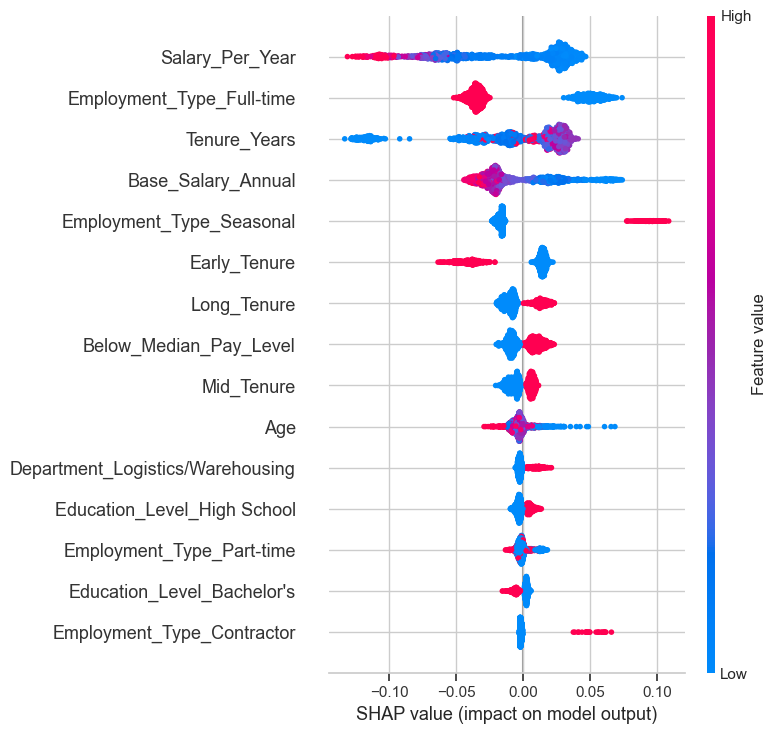

In [93]:
# TreeExplainer
explainer_rf = shap.TreeExplainer(rf_weighted.named_steps['model'])

# Compute SHAP values (Explanation object)
shap_values_rf = explainer_rf(x_test_processed)

# Select class 1 (attrition)
shap_values_class1 = shap_values_rf.values[:, :, 1]  # shape (n_samples, n_features)

# Compute mean absolute SHAP values
mean_abs_shap = np.abs(shap_values_class1).mean(axis=0)

# Create DataFrame
rf_shap_df = pd.DataFrame({
    'Feature': all_features,
    'Mean_Abs_SHAP': mean_abs_shap
}).sort_values(by='Mean_Abs_SHAP', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
plt.barh(
    rf_shap_df['Feature'].head(15)[::-1],
    rf_shap_df['Mean_Abs_SHAP'].head(15)[::-1],
    color='skyblue'
)
plt.xlabel("Mean |SHAP value|")
plt.title("Random Forest: Top 15 Feature Importances (SHAP)")
plt.show()

shap.summary_plot(
    shap_values_class1,
    x_test_processed,
    feature_names=all_features,
    max_display=15
)

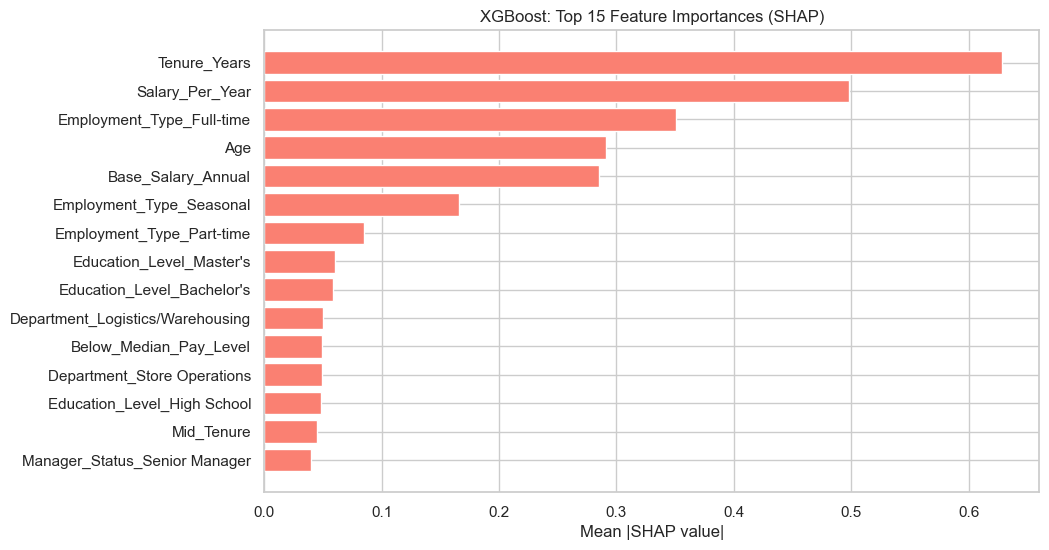

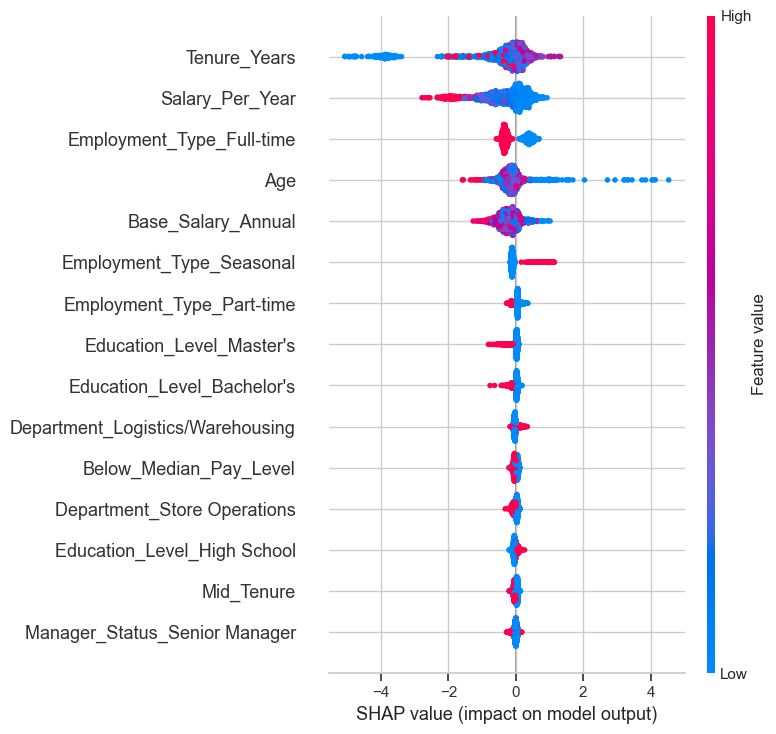

In [95]:
# TreeExplainer for XGBoost
explainer_xgb = shap.TreeExplainer(xgb_weighted.named_steps['model'])

# Compute SHAP values (2D array: n_samples x n_features)
shap_values_xgb = explainer_xgb(x_test_processed).values

# ---- Bar plot: Top 15 features ----
mean_abs_shap = np.abs(shap_values_xgb).mean(axis=0)

xgb_shap_df = pd.DataFrame({
    'Feature': all_features,
    'Mean_Abs_SHAP': mean_abs_shap
}).sort_values(by='Mean_Abs_SHAP', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(
    xgb_shap_df['Feature'].head(15)[::-1],
    xgb_shap_df['Mean_Abs_SHAP'].head(15)[::-1],
    color='salmon'
)
plt.xlabel("Mean |SHAP value|")
plt.title("XGBoost: Top 15 Feature Importances (SHAP)")
plt.show()

# ---- Beeswarm plot: Per-employee impact ----
shap.summary_plot(
    shap_values_xgb,
    x_test_processed,
    feature_names=all_features,
    max_display=15
)

In [96]:
import os

# Create models directory if it doesn't exist
os.makedirs("models", exist_ok=True)

In [97]:
import joblib

# Save Logistic Regression pipeline
joblib.dump(log_reg_engineered, "models/log_reg_pipeline.joblib")

# Save Random Forest pipeline
joblib.dump(rf_weighted, "models/rf_pipeline.joblib")

# Save XGBoost pipeline
joblib.dump(xgb_weighted, "models/xgb_pipeline.joblib")

print("All models saved successfully.")

All models saved successfully.


In [98]:
# Reload models
log_reg_loaded = joblib.load("models/log_reg_pipeline.joblib")
rf_loaded = joblib.load("models/rf_pipeline.joblib")
xgb_loaded = joblib.load("models/xgb_pipeline.joblib")

# Test prediction shape (use a few rows)
log_reg_loaded.predict_proba(x_test.head())
rf_loaded.predict_proba(x_test.head())
xgb_loaded.predict_proba(x_test.head())

print("Reload test passed.")

Reload test passed.
